# Data Loading and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [2]:
# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


stroke
0    4861
1     249
Name: count, dtype: int64


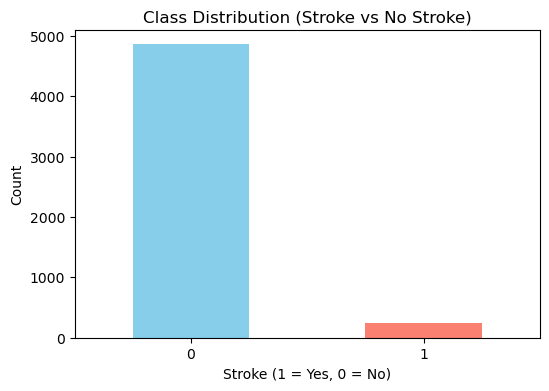

In [3]:
# Class distribution
stroke_counts = df['stroke'].value_counts()
print(stroke_counts)

# Plot
plt.figure(figsize=(6, 4))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Stroke vs No Stroke)')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [4]:
# Missing values
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


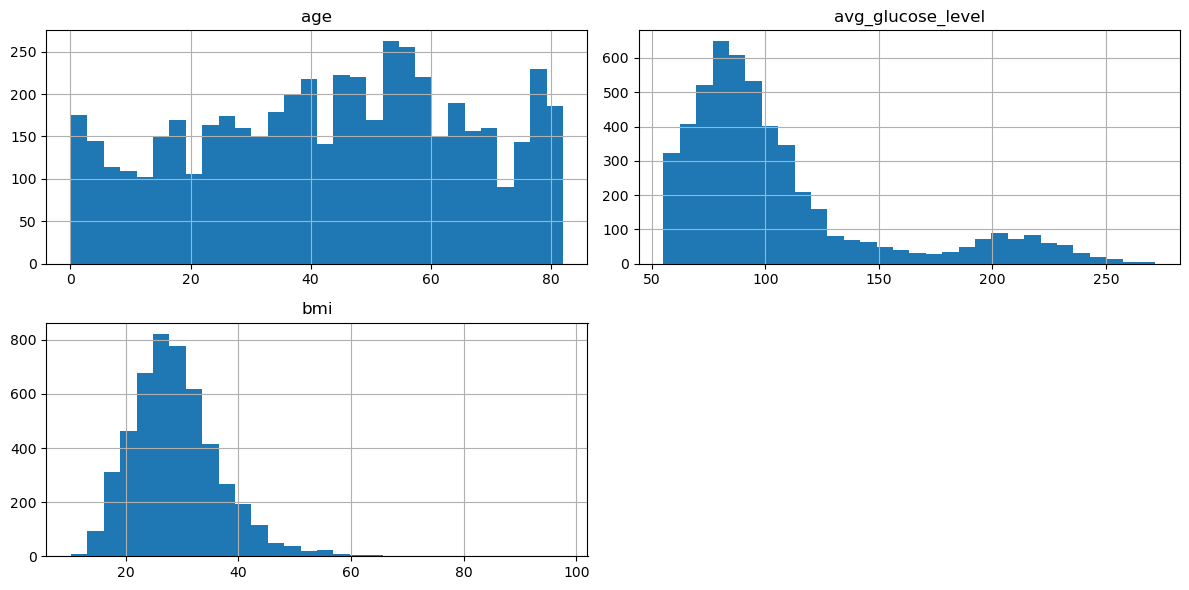

In [5]:
# Plot distributions of numeric features
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
df[numeric_cols].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

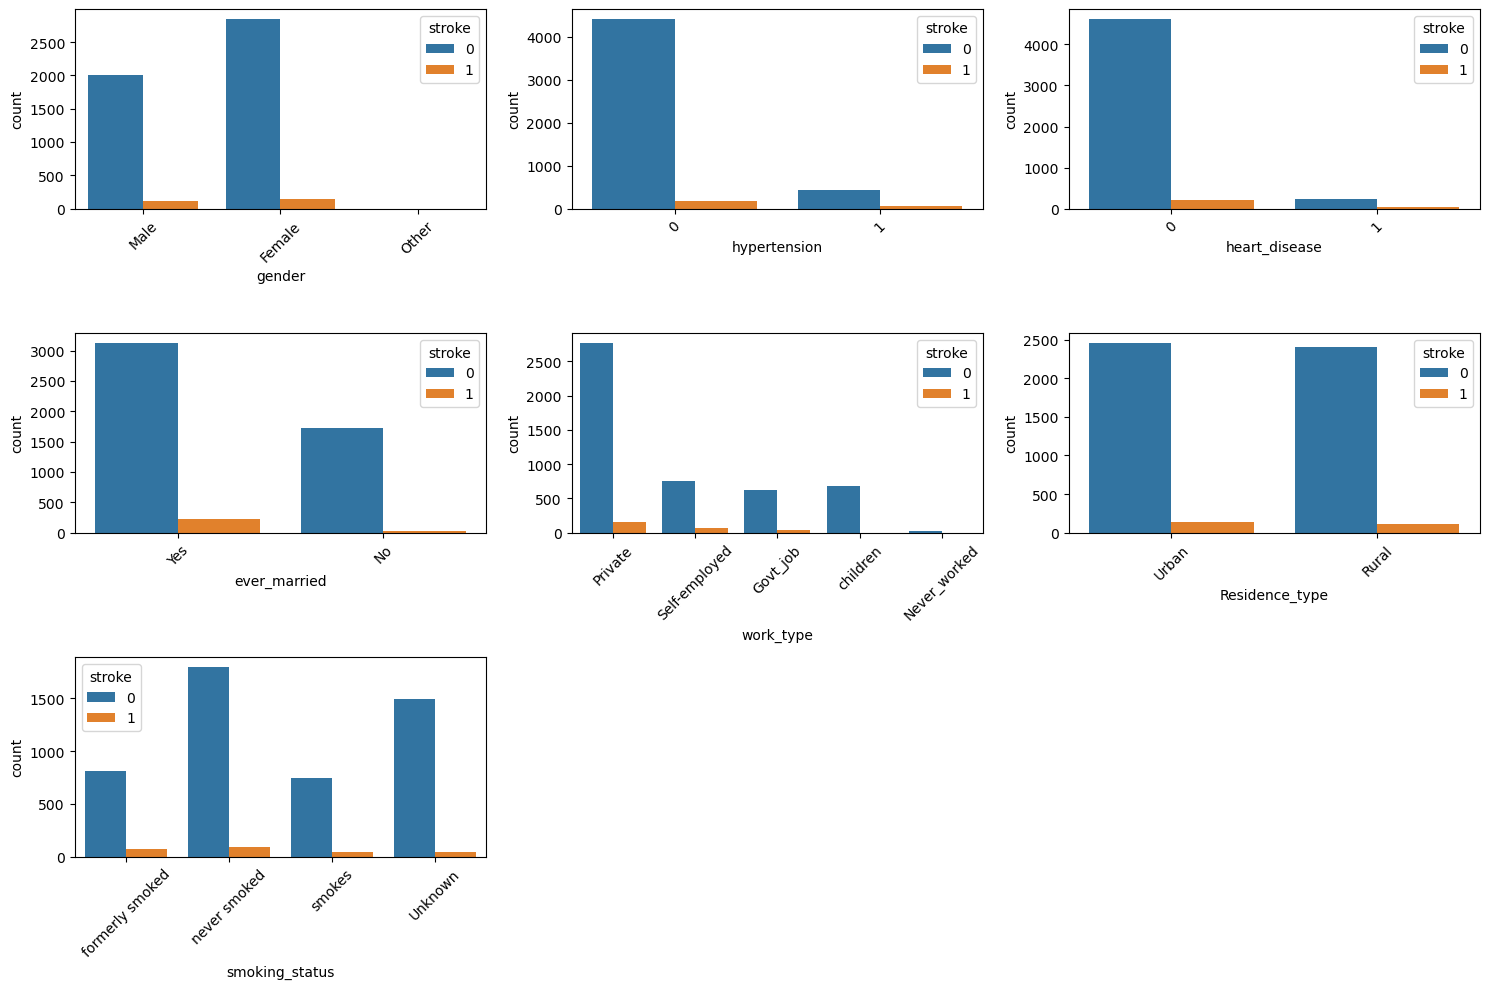

In [6]:
# Count plots for categorical features
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='stroke')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [8]:
if 'Other' in df['gender'].unique():
    df = df[df['gender'] != 'Other']  # Drop rows where gender is 'Other'
    print(f"Dropped {gender_counts['Other']} 'Other' rows.")

Dropped 1 'Other' rows.


In [9]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\hanan\AppData\Local\Temp\ipykernel_7788\1439978410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [10]:
# Binary categories (Yes/No -> 1/0)
df['ever_married'] = LabelEncoder().fit_transform(df['ever_married'])

# One-hot encode multi-class categories
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

df.drop('id', axis=1, inplace=True)

In [11]:
X = df.drop('stroke', axis=1)
y = df['stroke']

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Second split: 50% validation, 50% test (15% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train: {len(X_train)} (Stroke = {y_train.sum()})")
print(f"Val: {len(X_val)} (Stroke = {y_val.sum()})")
print(f"Test: {len(X_test)} (Stroke = {y_test.sum()})")

Train: 3576 (Stroke = 174)
Val: 766 (Stroke = 37)
Test: 767 (Stroke = 38)


In [12]:
df.head(20)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051242,0,1,1,2.706450,1.004893,1,True,False,True,False,False,True,True,False,False
1,0.785889,0,0,1,2.121652,-0.099142,1,False,False,False,True,False,False,False,True,False
2,1.626174,0,1,1,-0.004867,0.472358,1,True,False,True,False,False,False,False,True,False
3,0.255182,0,0,1,1.437473,0.719142,1,False,False,True,False,False,True,False,False,True
4,1.581949,1,0,1,1.501297,-0.631677,1,False,False,False,True,False,False,False,True,False
5,1.670400,0,0,1,1.768299,0.017755,1,True,False,True,False,False,True,True,False,False
6,1.360821,1,1,1,-0.796156,-0.190063,1,True,False,True,False,False,False,False,True,False
7,1.139693,0,0,0,-0.259502,-0.787541,1,False,False,True,False,False,True,False,True,False
8,0.697438,0,0,1,-0.662324,-0.099142,1,False,False,True,False,False,False,False,False,False
9,1.537723,0,0,1,-1.050570,-0.605700,1,False,False,True,False,False,True,False,False,False


In [13]:
joblib.dump((X_train, y_train), 'train_data.pkl')
joblib.dump((X_val, y_val), 'val_data.pkl')
joblib.dump((X_test, y_test), 'test_data.pkl')
print("\nPreprocessed data saved to disk.")


Preprocessed data saved to disk.
